In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfIdentity = pd.read_csv("../Dataset/ML/train_identity.csv")
dfIdentity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
dfTransactions = pd.read_csv("../Dataset/ML/train_transaction.csv")
dfTransactions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dfMerge = dfTransactions.merge(dfIdentity, on = "TransactionID", how = "left")

del dfTransactions
del dfIdentity

dfMerge.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


### Box Plot
#### Distribución de los costos por transacción según si fue fraude o no

[Text(0.5, 1.0, 'Distribución de los costos\npor transacción según fraude'),
 Text(0, 0.5, 'Costo por transacción'),
 Text(0.5, 0, 'Fue fraude'),
 [Text(0, 0, 'No'), Text(1, 0, 'Sí')]]

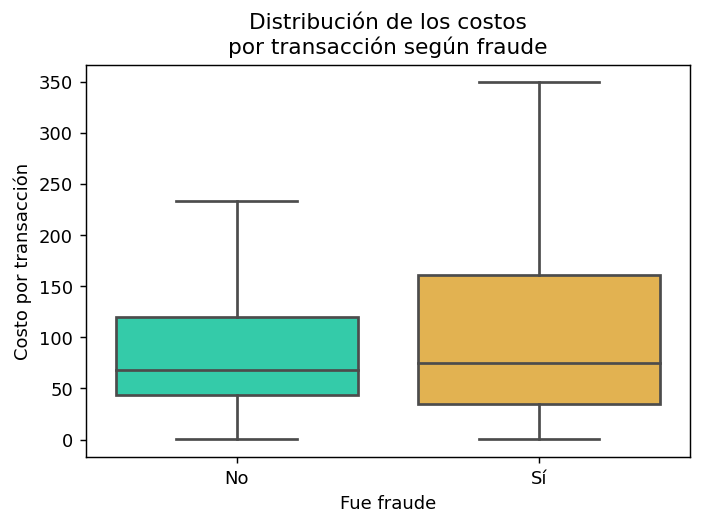

In [5]:
plt.subplots(dpi = 130)

ax = sns.boxplot(data = dfMerge[["TransactionAmt", "isFraud"]], x = "isFraud",
                 y = "TransactionAmt", showfliers = False, palette = "turbo")
ax.set(title = "Distribución de los costos\npor transacción según fraude",
       ylabel = "Costo por transacción", xlabel = "Fue fraude",
       xticklabels = ["No", "Sí"])

### Bar Plot
#### Top 5 dominios de mail del comprador con mayor porcentaje de fraudes

In [6]:
gbMail = dfMerge.groupby("P_emaildomain").agg({"isFraud": ["count", "sum"]}).reset_index()
gbMail["porcentaje"] = gbMail["isFraud"]["sum"] / gbMail["isFraud"]["count"]
gbMail.head()

P_emaildomain isFraud      porcentaje
                   count  sum           
0        aim.com     315   40   0.126984
1  anonymous.com   36998  859   0.023217
2        aol.com   28289  617   0.021811
3        att.net    4033   30   0.007439
4  bellsouth.net    1909   53   0.027763

[Text(0.5, 1.0, 'Top 5 dominios de mail\ncon mayor porcentaje de fraudes'),
 Text(0.5, 0, 'Dominio de mail'),
 Text(0, 0.5, 'Porcentaje de fraudes')]

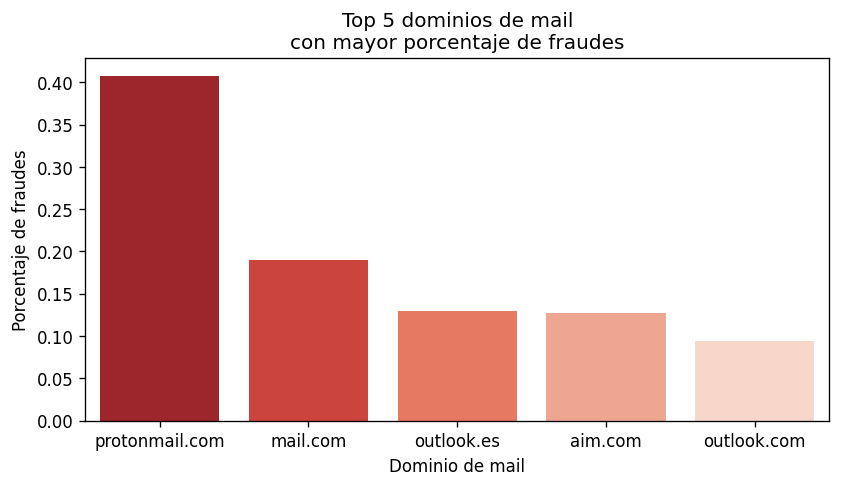

In [7]:
plt.subplots(dpi = 120, figsize = (8,4))

ax = sns.barplot(data = gbMail.nlargest(5, "porcentaje"), x = "P_emaildomain",
                 y = "porcentaje", palette = "Reds_r")
ax.set(title = "Top 5 dominios de mail\ncon mayor porcentaje de fraudes",
       xlabel = "Dominio de mail", ylabel = "Porcentaje de fraudes")

In [8]:
del gbMail

### Heatmap
#### Cantidad de fraudes según tipo de producto y entidad financiera

In [9]:
gbProductoFinanciera = dfMerge.groupby(["card4", "ProductCD"]).agg({"isFraud": "sum"}).reset_index()
gbProductoFinanciera.columns =  ["card4", "ProductCD", "sum"]
gbProductoFinanciera.head()

,card4,ProductCD,sum
0,american express,C,2
1,american express,H,91
2,american express,R,111
3,american express,S,35
4,discover,H,45


[Text(0.5, 1.0, 'Cantidad de fraudes según\ntipo de producto y entidad financiera'),
 Text(0.5, 23.194444444444446, 'Tipo de producto'),
 Text(50.69444444444444, 0.5, 'Tipo de tarjeta')]

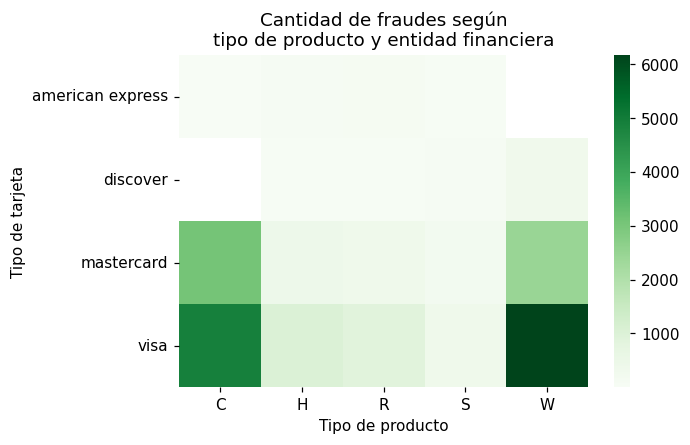

In [10]:
plt.subplots(dpi = 110)

ax = sns.heatmap(data = gbProductoFinanciera.pivot("card4", "ProductCD", "sum"), cmap = "Greens")
ax.set(title = "Cantidad de fraudes según\ntipo de producto y entidad financiera",
       xlabel = "Tipo de producto", ylabel = "Tipo de tarjeta")

In [11]:
del gbProductoFinanciera

### Violin Plot
#### Distribución del campo D2 según si fue fraude o no

[Text(0.5, 1.0, 'Distribución del campo D2 según fraude'),
 Text(0.5, 0, 'Fue fraude'),
 [Text(0, 0, 'No'), Text(1, 0, 'Sí')]]

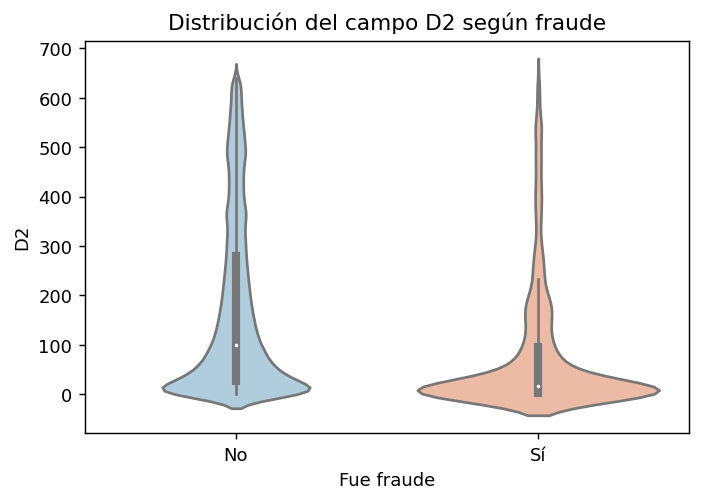

In [12]:
plt.subplots(dpi = 130)

ax = sns.violinplot(data = dfMerge[["D2", "isFraud"]],
                    x = "isFraud", y = "D2", palette = "RdBu_r")
ax.set(title = "Distribución del campo D2 según fraude",
       xlabel = "Fue fraude", xticklabels = ["No", "Sí"])

### Bar plot
#### Porcentaje de fraude en los navegadores más utilizados

In [13]:
browsers = ["chrome", "safari", "samsung", "firefox", "ie 11.0", "edge", "opera", "android"]
def parse_id31(x):
    if pd.isna(x):
        return "NA"

    for browser in browsers:
        if browser in str(x):
            return browser

    return "Other"

dfMerge["browser"] = dfMerge["id_31"].apply(lambda x: parse_id31(x))

In [14]:
gbBrowser = dfMerge.groupby("browser").agg({"isFraud": ["sum", "count"]}).reset_index()
gbBrowser.columns = ["browser", "sum", "count"]
gbBrowser["Porcentaje"] = gbBrowser["sum"] / gbBrowser["count"]
gbBrowser

,browser,sum,count,Porcentaje
0,NA,9492,450258,0.021081
1,Other,136,973,0.139774
2,android,84,386,0.217617
3,chrome,7298,76059,0.095952
4,edge,225,6401,0.035151
5,firefox,548,7012,0.078152
6,ie 11.0,176,9677,0.018187
7,opera,142,449,0.316258
8,safari,2384,37281,0.063947
9,samsung,178,2044,0.087084


[Text(0.5, 1.0, 'Porcentaje de fraude en los navegadores más utilzados'),
 Text(0.5, 0, 'Navegador')]

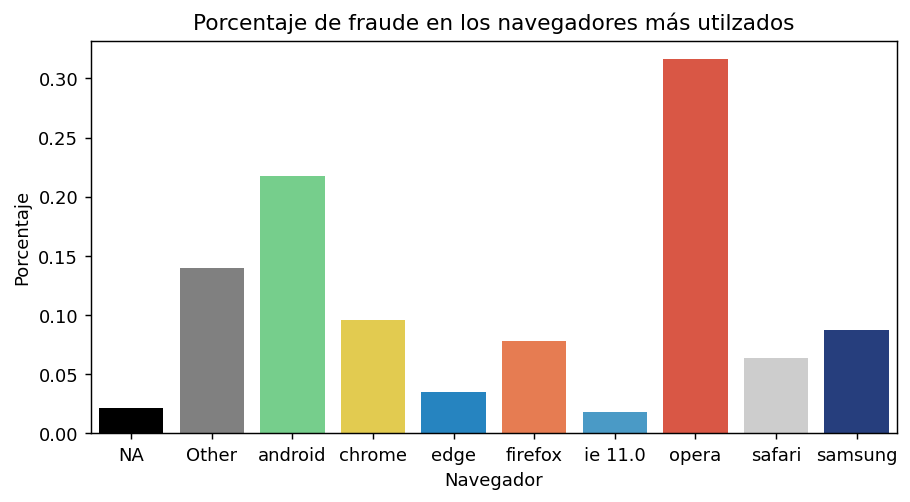

In [15]:
plt.subplots(dpi = 130, figsize = (8,4))

ax = sns.barplot(data = gbBrowser, x = "browser", y = "Porcentaje",
                 palette = ["black", "gray", "#67dd84", "#fadb38", "#0c8ada",
                            "#FF7139", "#35a0db", "#f2452c", "#cdcdcd", "#18378b"]) # Colores en base a las marcas
ax.set(title = "Porcentaje de fraude en los navegadores más utilzados", xlabel = "Navegador")

In [16]:
del gbBrowser

### Multiple Bar Plot
#### Cantidad de transacciones por tipo de dispositivo

In [17]:
gbDevice = dfMerge.groupby(["DeviceType", "isFraud"]).count().reset_index()
gbDevice = gbDevice[["DeviceType", "TransactionID", "isFraud"]]
gbDevice["isFraud"] = gbDevice["isFraud"].transform(lambda x: "Sí" if x else "No")
gbDevice.columns = ["DeviceType", "TransactionID", "Fue fraude"]
gbDevice.head()

,DeviceType,TransactionID,Fue fraude
0,desktop,79611,No
1,desktop,5554,Sí
2,mobile,49988,No
3,mobile,5657,Sí


[Text(0.5, 1.0, 'Cantidad de transacciones\npor tipo de dispositivo'),
 Text(0, 0.5, 'Cantidad de transacciones'),
 Text(0.5, 0, 'Tipo de dispositivo')]

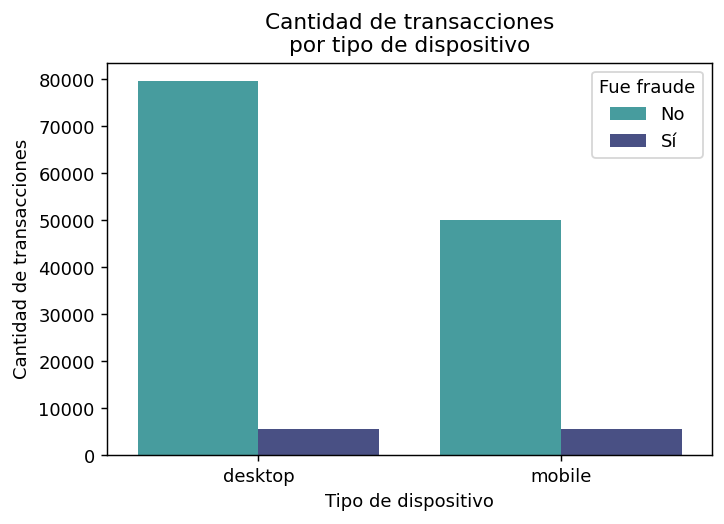

In [18]:
plt.subplots(dpi = 130)
ax = sns.barplot(data = gbDevice, x = "DeviceType", y = "TransactionID",
                 hue = "Fue fraude", palette = "mako_r")
ax.set(title = "Cantidad de transacciones\npor tipo de dispositivo",
       ylabel = "Cantidad de transacciones", xlabel = "Tipo de dispositivo")

In [19]:
del gbDevice